# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [4]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [5]:
df_taxi[:3]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [6]:
df_taxi.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [7]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [8]:
df_taxi.shape

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

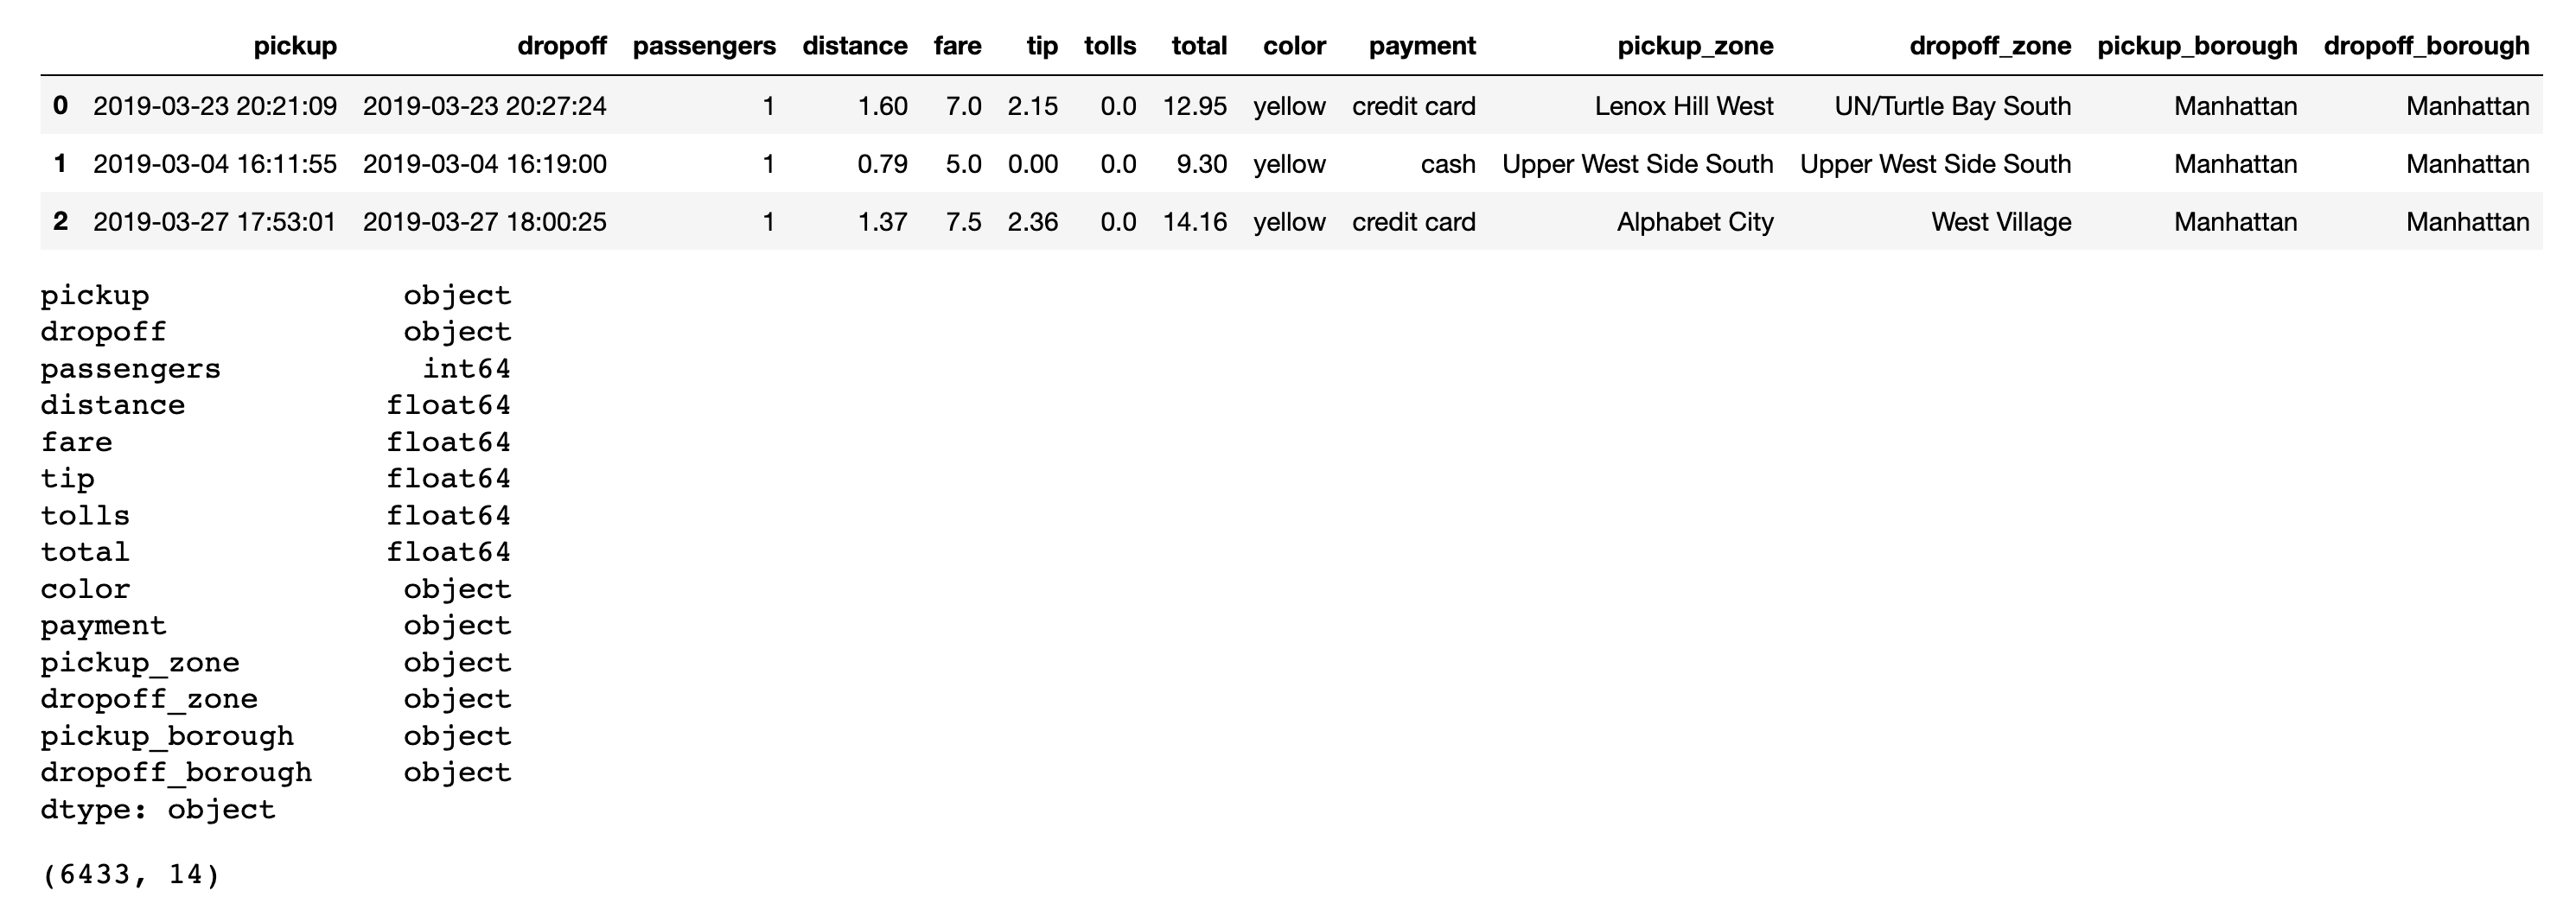

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [9]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [10]:
payment_na = df_taxi[df_taxi['payment'].isna()]
payment_na

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.0,0.00,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.0,0.00,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.0,0.00,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.0,0.00,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
621,2019-03-15 17:16:35,2019-03-15 17:25:01,1,1.3,7.5,0.0,0.00,11.80,yellow,NaN,Upper East Side North,Upper East Side South,Manhattan,Manhattan
770,2019-03-02 03:16:59,2019-03-02 03:17:06,0,9.4,2.5,0.0,0.00,3.80,yellow,NaN,JFK Airport,JFK Airport,Queens,Queens
913,2019-03-23 11:26:58,2019-03-23 11:35:17,2,1.3,7.5,0.0,0.00,10.80,yellow,NaN,Upper East Side South,Lincoln Square West,Manhattan,Manhattan
953,2019-03-08 02:58:37,2019-03-08 03:19:27,2,6.9,23.5,0.0,0.00,27.30,yellow,NaN,Garment District,Central Harlem North,Manhattan,Manhattan
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.0,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1372,2019-03-12 09:19:44,2019-03-12 09:43:09,1,1.6,14.5,0.0,0.00,17.80,yellow,NaN,Midtown East,Garment District,Manhattan,Manhattan


In [11]:
dropoff_zone_na = df_taxi[df_taxi['dropoff_zone'].isna()]
dropoff_zone_na

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


Комбінативна таблиця

In [12]:
payment_dropoff_zone_na = df_taxi[df_taxi['payment'].isna() | df_taxi['dropoff_zone'].isna()]
payment_dropoff_zone_na

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.00,0.0,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.00,0.0,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.00,0.0,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,2019-03-30 00:49:48,2019-03-30 00:49:56,1,0.0,25.0,0.00,0.0,25.50,green,credit card,Prospect Heights,NaN,Brooklyn,NaN
6169,2019-03-27 02:11:01,2019-03-27 02:12:03,1,4.1,3.0,0.00,0.0,4.30,green,NaN,Jackson Heights,Jackson Heights,Queens,Queens
6311,2019-03-12 07:10:30,2019-03-12 07:14:18,1,0.7,4.5,0.00,0.0,5.30,green,NaN,Long Island City/Hunters Point,Long Island City/Hunters Point,Queens,Queens
6314,2019-03-28 22:36:04,2019-03-28 22:36:07,1,0.0,25.0,0.00,0.0,25.00,green,cash,Jamaica,NaN,Queens,NaN


Перша гіпотеза полягає в тому, що пропощені значення колонок payment і dropoff_zone є у коротких поїздок, або тих які не відбулись. Для цього створю нову колонку, де буде визначено тривалість поїздки:

In [13]:
df_taxi['Hour_pickup'] = pd.to_datetime(df_taxi['pickup'])
df_taxi['Hour_dropoff'] = pd.to_datetime(df_taxi['dropoff'])
df_taxi['drive_time'] = df_taxi['Hour_dropoff'] - df_taxi['Hour_pickup']

Потім знайду кількість записів, де тривалість поїздки менше 1 і 2 хвилин. Як бачимо - їх кількість більша за кількість строк де відсутні значення payment/dropoff_zone, тобто гіпотеза не підверджується

In [17]:
drive_less_1minutes = len(df_taxi[df_taxi['drive_time'] < pd.Timedelta(minutes = 1)])
drive_less_2minute = len(df_taxi[df_taxi['drive_time'] < pd.Timedelta(minutes = 2)])
print (drive_less_1minutes)
print (drive_less_2minute)

72
160


Можливо відсутність значення payment/dropoff_zone повязано з певним районом? Перевірю спочатку  унікальні райони, а потім частоту певних районів саме з NA в payment/dropoff_zone

In [18]:
print(df_taxi['pickup_zone'].nunique())
print(df_taxi['dropoff_zone'].nunique())

194
203


In [19]:
payment_na['dropoff_zone'].value_counts()

Murray Hill                       3
Upper East Side South             3
Bushwick South                    2
Forest Hills                      2
JFK Airport                       2
Long Island City/Hunters Point    2
Midtown North                     2
Times Sq/Theatre District         2
Upper West Side South             1
Meatpacking/West Village West     1
Battery Park City                 1
West Village                      1
Flatiron                          1
Upper West Side North             1
Stuy Town/Peter Cooper Village    1
Lincoln Square East               1
West Concourse                    1
Hamilton Heights                  1
Crown Heights South               1
West Chelsea/Hudson Yards         1
Midtown East                      1
Morningside Heights               1
Union Sq                          1
Penn Station/Madison Sq West      1
Columbia Street                   1
Little Italy/NoLiTa               1
Upper East Side North             1
Baisley Park                

In [20]:
payment_na['pickup_zone'].value_counts()

JFK Airport                       4
Murray Hill                       3
Garment District                  3
Long Island City/Hunters Point    2
Midtown Center                    2
TriBeCa/Civic Center              2
Upper East Side South             2
Hamilton Heights                  1
Midtown North                     1
Morningside Heights               1
Penn Station/Madison Sq West      1
Upper West Side North             1
West Chelsea/Hudson Yards         1
West Village                      1
Meatpacking/West Village West     1
Crown Heights South               1
East Village                      1
East Harlem North                 1
Times Sq/Theatre District         1
Upper West Side South             1
Boerum Hill                       1
Lincoln Square East               1
Two Bridges/Seward Park           1
Yorkville West                    1
Lenox Hill West                   1
Lower East Side                   1
East New York                     1
Midtown East                

Зони не співпадають, особливих закономірностей не визначено. Тому роблю припущення, що це можливий збій у системі, який не фіксував дані. Перевіру яка частка таких збоїв на загальну к-ть записів. Ця частка складає 1.4%

In [21]:
len(payment_dropoff_zone_na)/df_taxi.shape[0]

0.013679465257267216

У випадку коли distance == 0, a total !=0, переглянемо дані:

In [22]:
distance_and_total= df_taxi[(df_taxi['distance'] ==0) & (df_taxi['total'] !=0)]
distance_and_total

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,Hour_pickup,Hour_dropoff,drive_time
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN,2019-03-30 23:59:14,2019-03-30 23:59:17,0 days 00:00:03
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,2019-03-21 17:21:44,2019-03-21 17:21:49,0 days 00:00:05
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN,2019-03-12 19:52:36,2019-03-12 19:52:55,0 days 00:00:19
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan,2019-03-08 04:50:48,2019-03-08 04:51:07,0 days 00:00:19
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN,2019-03-29 00:02:00,2019-03-29 00:02:05,0 days 00:00:05
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens,2019-03-04 14:17:05,2019-03-04 14:17:13,0 days 00:00:08
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan,2019-03-08 15:41:20,2019-03-08 15:41:23,0 days 00:00:03
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan,2019-03-10 20:27:25,2019-03-10 20:28:33,0 days 00:01:08
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN,2019-03-22 06:24:14,2019-03-22 06:24:14,0 days 00:00:00
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens,2019-03-25 14:37:56,2019-03-25 14:38:22,0 days 00:00:26


Можливо водій додавав вручну дані про поїздку (ну якщо це можливо взагалі), де помітив, що дані не зафіксуватись, тому що майже на всіх поїдках drive_time дуже короткий. Це можна перевірити порівнявши к-ть записі

In [23]:
len(distance_and_total)/ len(payment_dropoff_zone_na)

0.5795454545454546

Як бачимо, кількість пропущених значень в колонках payment і dropoff_zone більша за кількість distance_and_total. Значить - гіпотеза не вірна

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [24]:
df_taxi_clean = df_taxi.dropna()

Після виконання завдання запустіть наступну клітинку:

In [25]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
Hour_pickup        0
Hour_dropoff       0
drive_time         0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

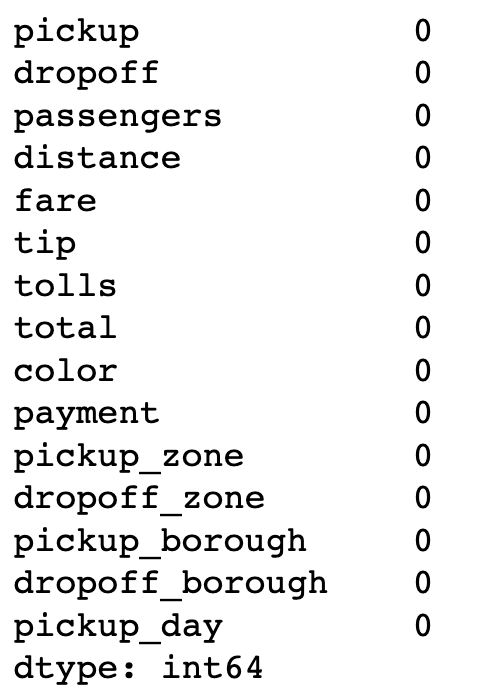

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [26]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])

/var/folders/zl/bwysq3tn1kx6l6hdmp9mxqtm0000gn/T/ipykernel_36034/4215144757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])


Після виконання завдання запустіть наступну клітинку:

In [27]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

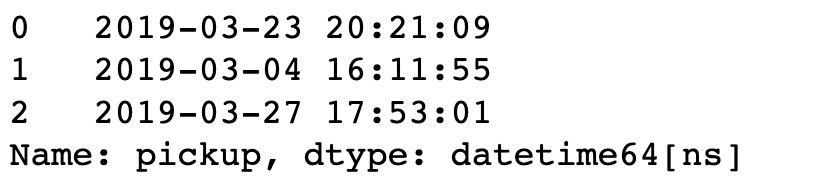

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [28]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

/var/folders/zl/bwysq3tn1kx6l6hdmp9mxqtm0000gn/T/ipykernel_36034/4249762047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')


А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

In [29]:
grouped_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()

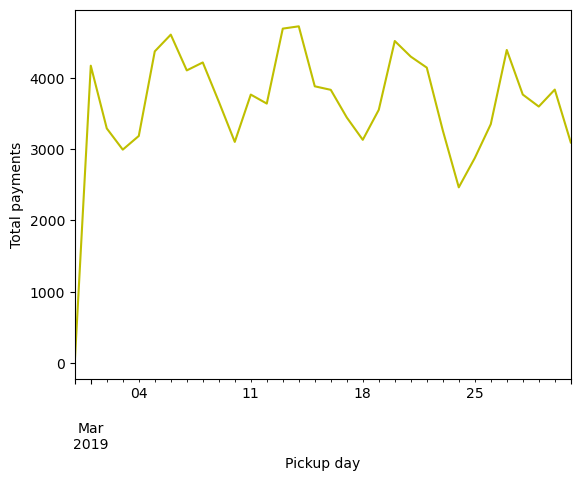

In [25]:
grouped_payment.plot(color = 'y')
plt.xlabel('Pickup day')
plt.ylabel('Total payments');

Очікується графік:

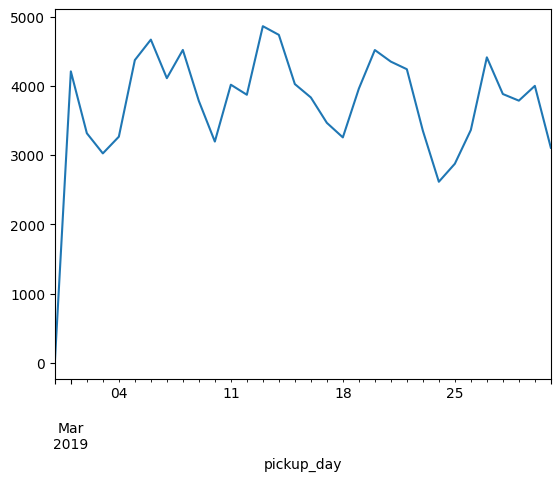

6.Виведіть кількість рядків для кожного pickup_day.

In [30]:
df_taxi_clean['pickup_day'].value_counts()

2019-03-14    258
2019-03-06    255
2019-03-13    240
2019-03-01    236
2019-03-20    233
2019-03-27    230
2019-03-08    229
2019-03-05    228
2019-03-22    225
2019-03-16    220
2019-03-21    218
2019-03-07    217
2019-03-12    212
2019-03-30    209
2019-03-23    206
2019-03-11    205
2019-03-29    204
2019-03-28    202
2019-03-09    199
2019-03-15    197
2019-03-19    194
2019-03-02    194
2019-03-31    186
2019-03-10    182
2019-03-17    177
2019-03-26    177
2019-03-04    170
2019-03-18    170
2019-03-03    167
2019-03-25    155
2019-03-24    145
2019-02-28      1
Name: pickup_day, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [31]:
df_taxi_clean.drop(df_taxi_clean[df_taxi_clean['pickup_day'] == '2019-02-28'].index, inplace = True)

/var/folders/zl/bwysq3tn1kx6l6hdmp9mxqtm0000gn/T/ipykernel_36034/2294800843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxi_clean.drop(df_taxi_clean[df_taxi_clean['pickup_day'] == '2019-02-28'].index, inplace = True)


In [32]:
grouped_payment = df_taxi_clean.groupby('pickup_day')['total'].sum()

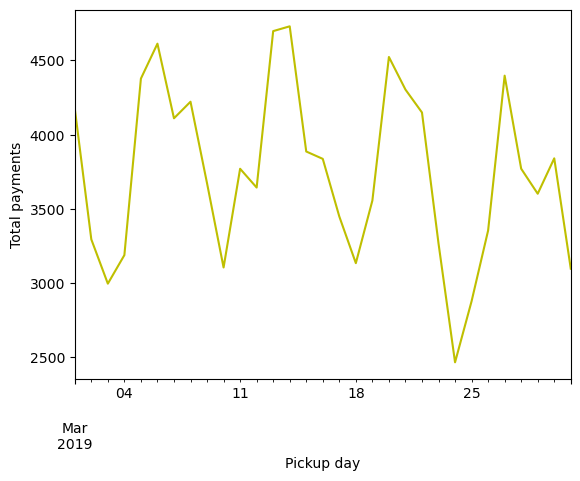

In [29]:
grouped_payment.plot(color = 'y')
plt.xlabel('Pickup day')
plt.ylabel('Total payments');

Очікуваний графік:

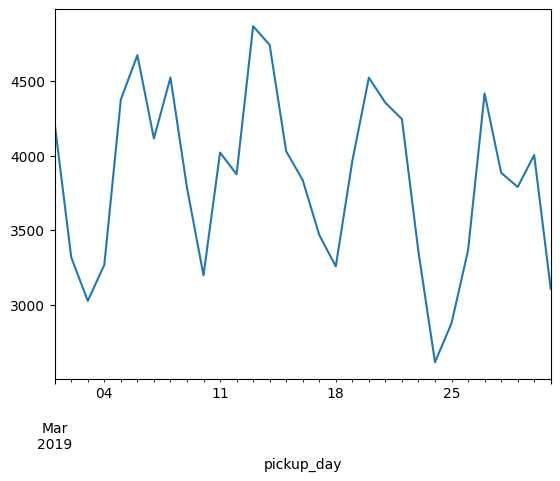

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [33]:
borough_pivot = df_taxi_clean.pivot_table(
    index = ['pickup_day'], 
    columns = ['pickup_borough'],
    values='total', 
    aggfunc='sum').fillna(0)
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,348.25,3150.87,553.29
2019-03-02,0.00,146.56,2695.43,452.33
2019-03-03,80.75,407.06,2100.23,407.93
2019-03-04,92.00,188.73,2026.17,881.38
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3450.01,833.36
2019-03-07,0.00,440.75,3082.02,587.13
2019-03-08,79.20,237.47,3238.09,666.78
2019-03-09,80.22,187.88,2892.17,511.73


Не до кінця розумію, що правильніше в цьому випадку - заповнити NA 0, чи видалити зовсім

In [34]:
borough_pivot1 = df_taxi_clean.pivot_table(
    index = ['pickup_day'], 
    columns = ['pickup_borough'],
    values='total', 
    aggfunc='sum').dropna()
borough_pivot1

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,348.25,3150.87,553.29
2019-03-03,80.75,407.06,2100.23,407.93
2019-03-04,92.00,188.73,2026.17,881.38
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3450.01,833.36
2019-03-08,79.20,237.47,3238.09,666.78
2019-03-09,80.22,187.88,2892.17,511.73
2019-03-10,119.86,160.48,2342.15,482.34
2019-03-11,46.04,250.62,2882.93,590.35


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

.fillna(0) нам тут для того, щоб на графіку не було переривання ліній , тобто не було пропущених даних

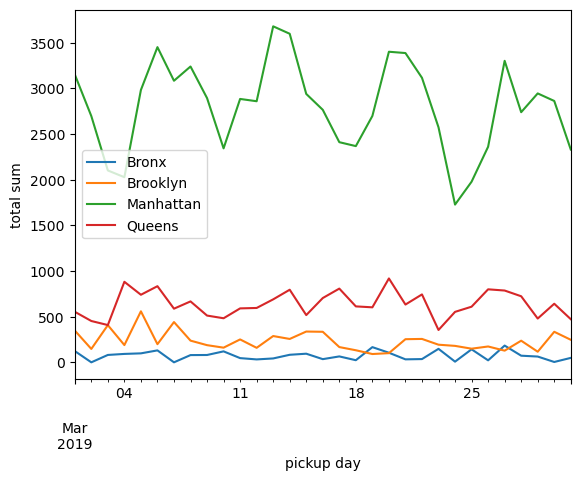

In [35]:
borough_pivot.fillna(0).plot()
plt.legend(loc = 'center left')
plt.xlabel ('pickup day')
plt.ylabel ('total sum');

Очікуваний графік :

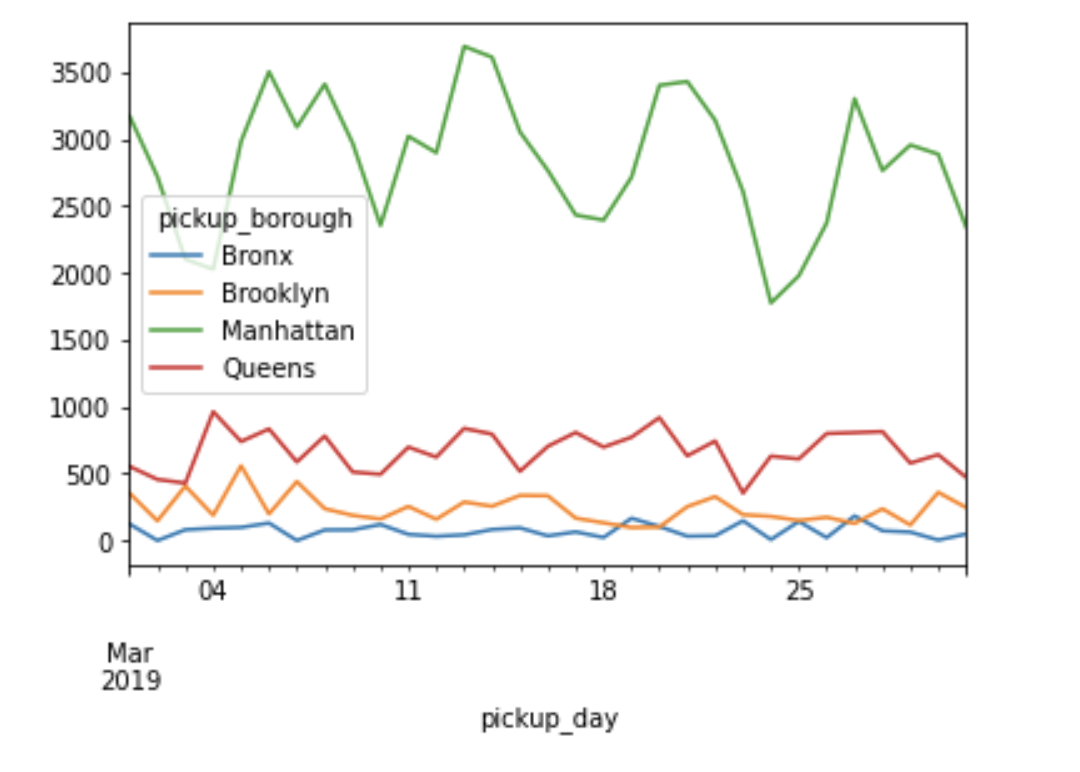

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

Дані містять всього 31 строку, тому bins не потрібно брати великим значенням. Я обрала розмір 6, тому при такому розмірі немає пропусків на діаграмі

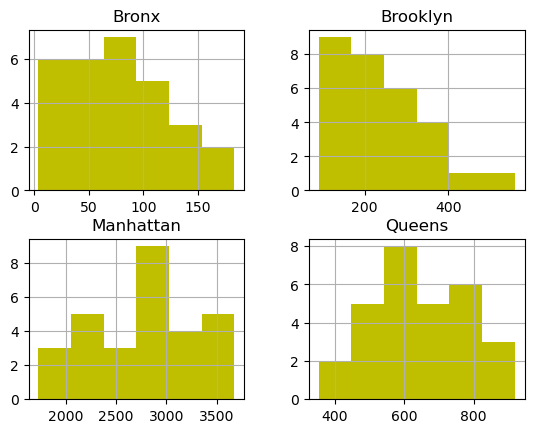

In [36]:
borough_pivot1.hist(bins = 6, color = 'y')
plt.axis('tight');

Приклад одного з правильних виконань завдання:

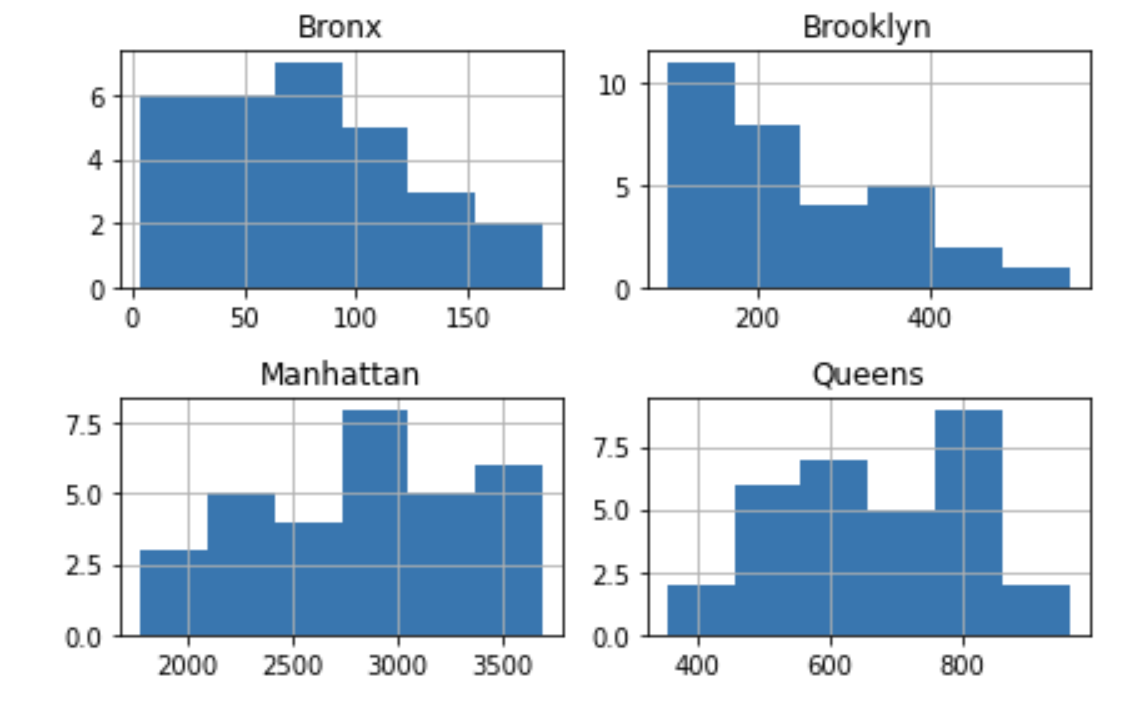

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

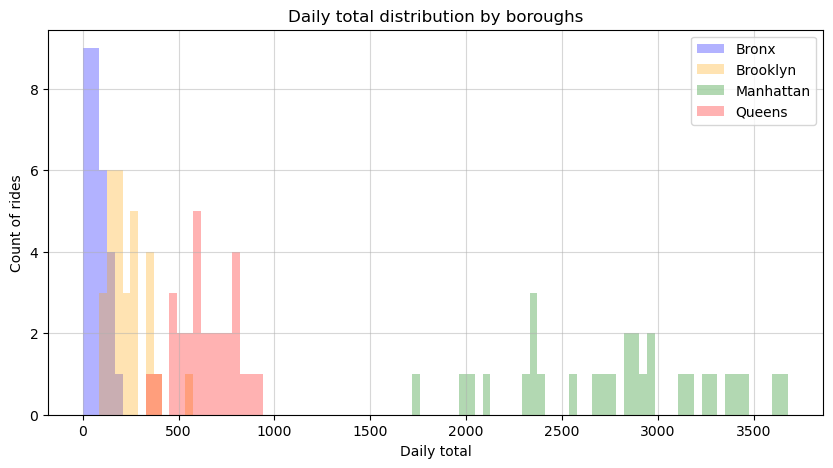

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

borough_pivot1.plot.hist(ax=ax, bins=90, alpha=0.3, color=['blue','orange','green','red'])

ax.set_title('Daily total distribution by boroughs')
ax.set_xlabel('Daily total')
ax.set_ylabel('Сount of rides')
ax.legend()
plt.grid(axis='both', alpha=.5)

plt.show();

Очікуваний результат:

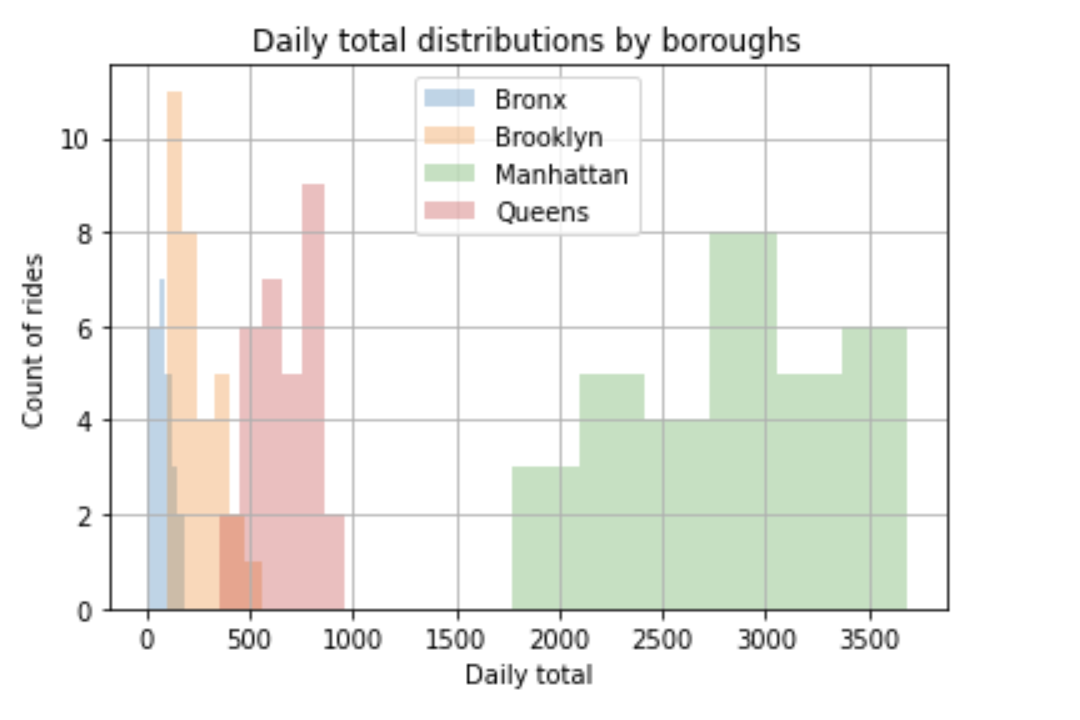

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

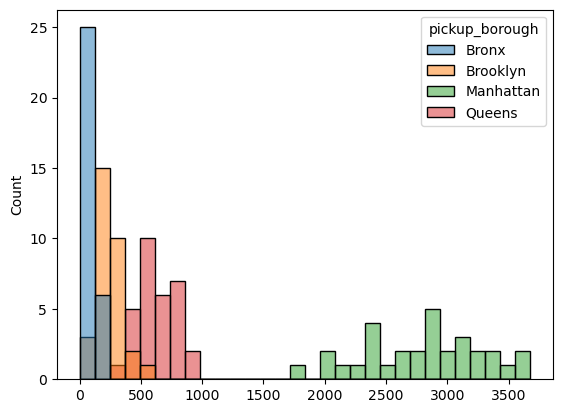

In [70]:
sns.histplot(data=borough_pivot, bins=30);

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

In [39]:
df_taxi_clean_sorted = df_taxi_clean.sort_values(by = 'color', ascending= True)

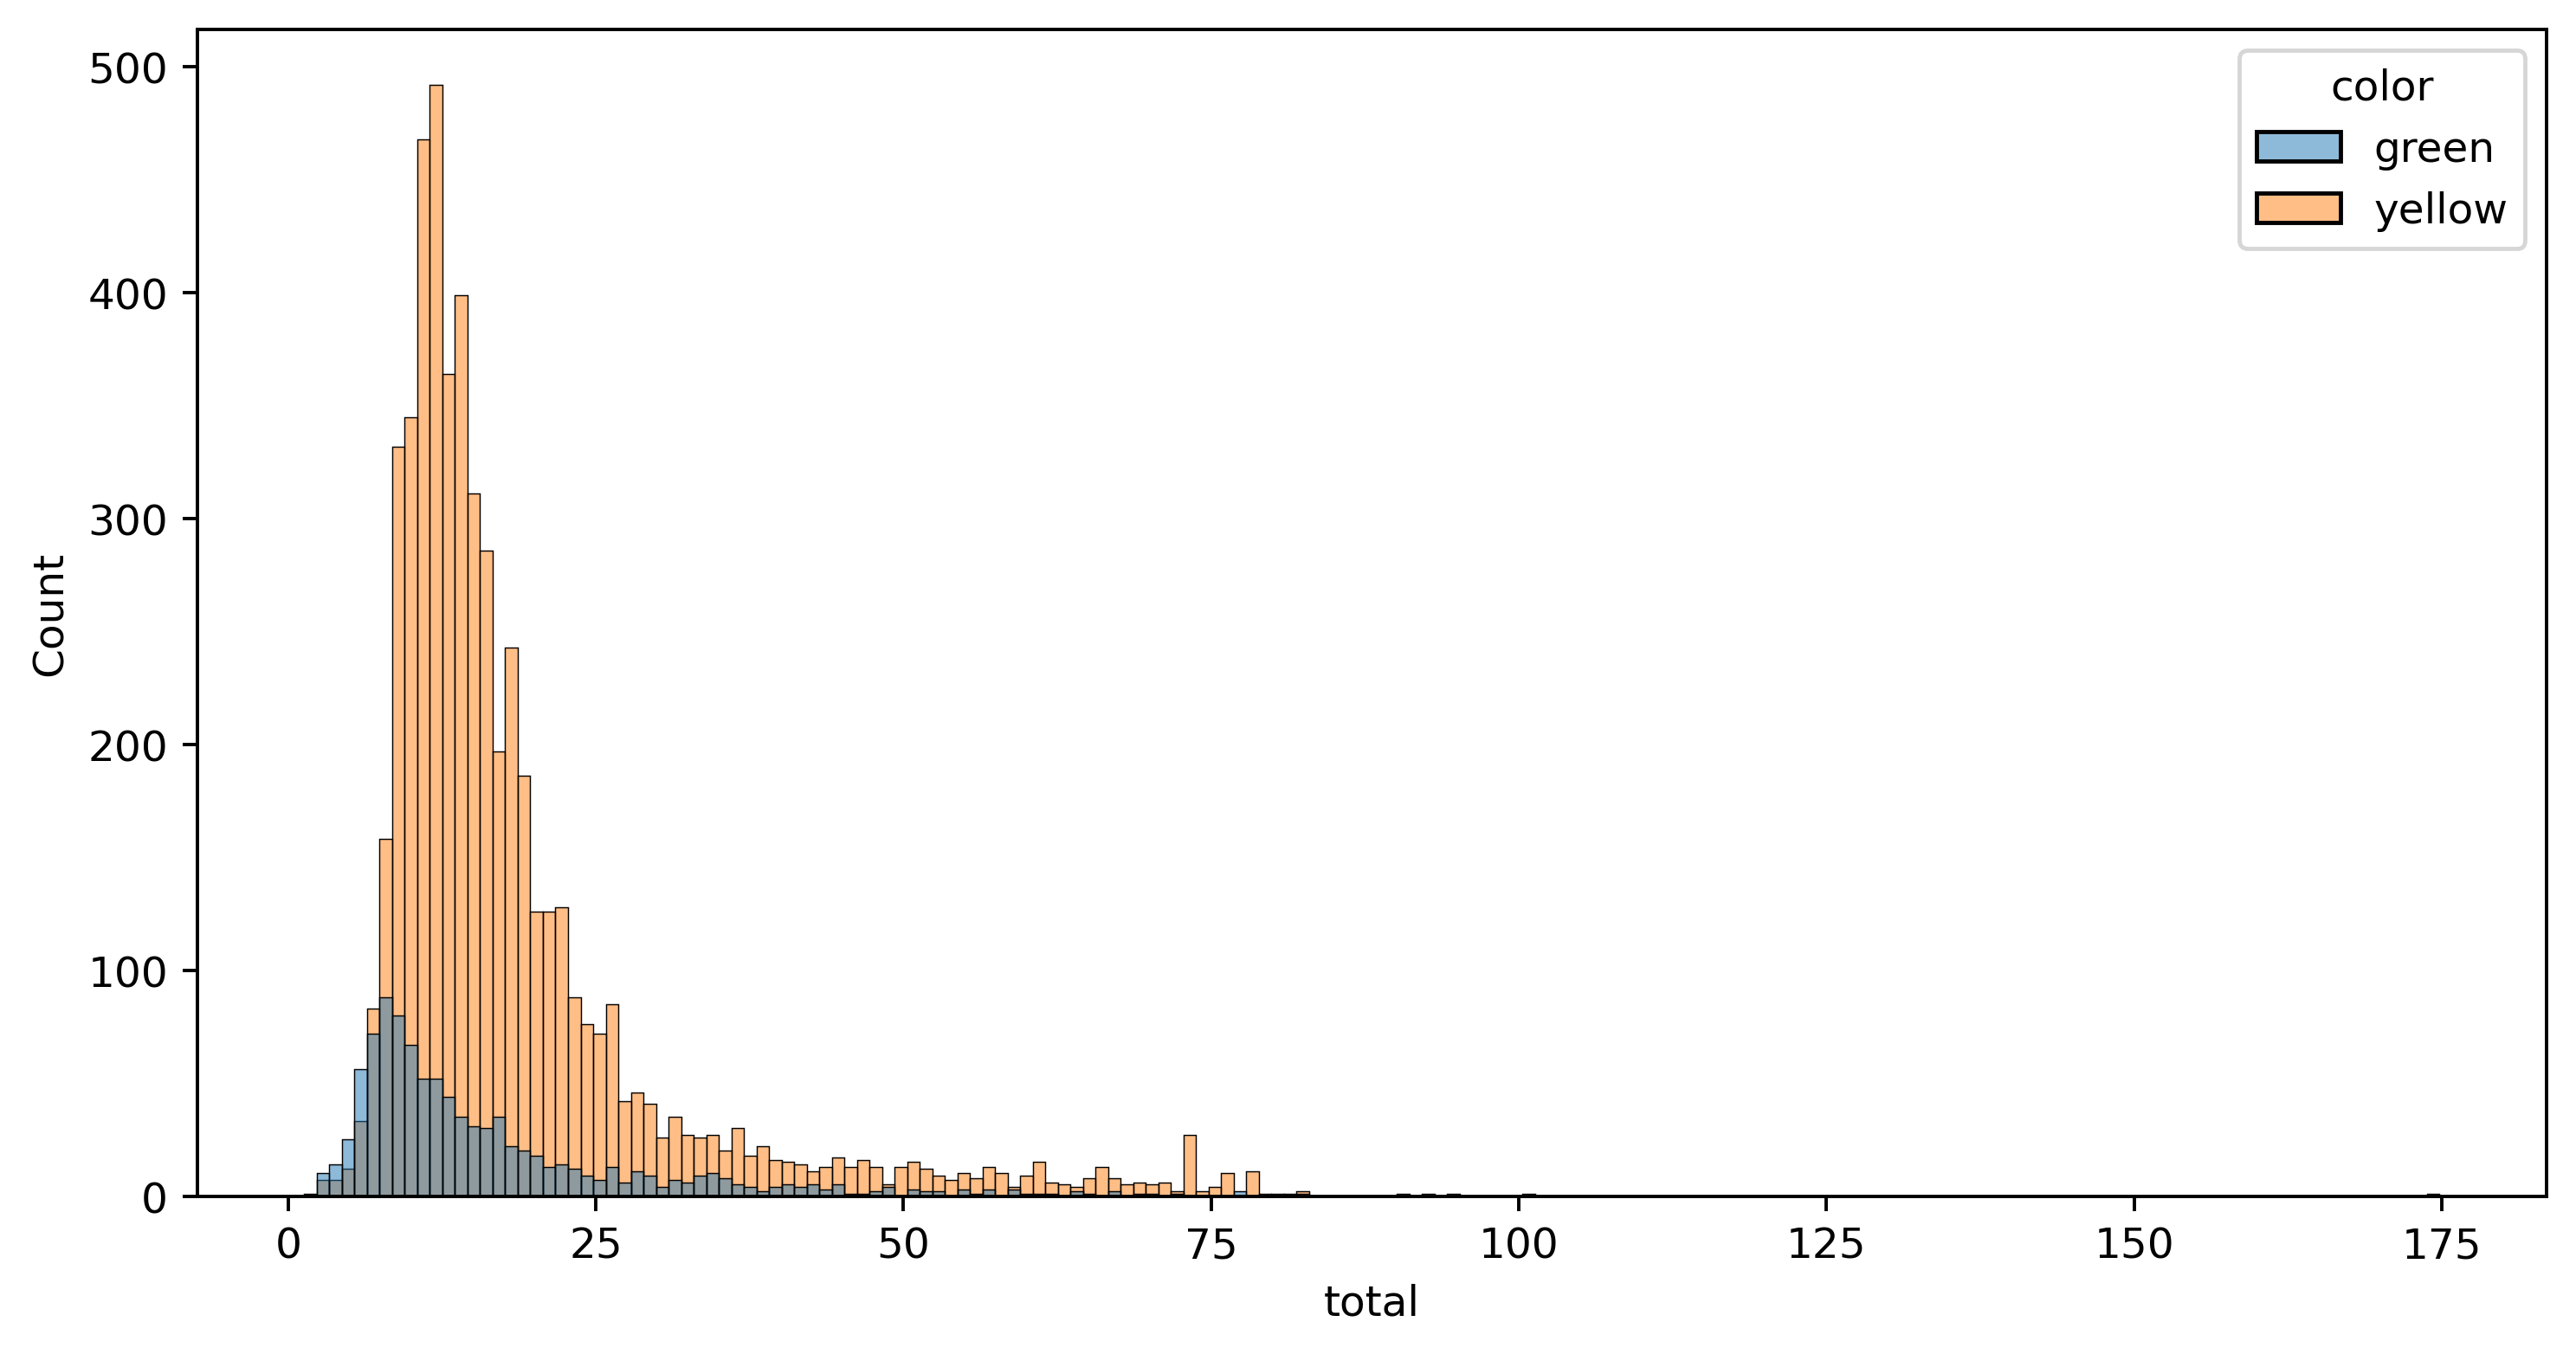

In [40]:
plt.figure(figsize=(10,5), dpi=350)
sns.histplot(data = df_taxi_clean_sorted, x = 'total',  hue='color');

Очікуваний результат:

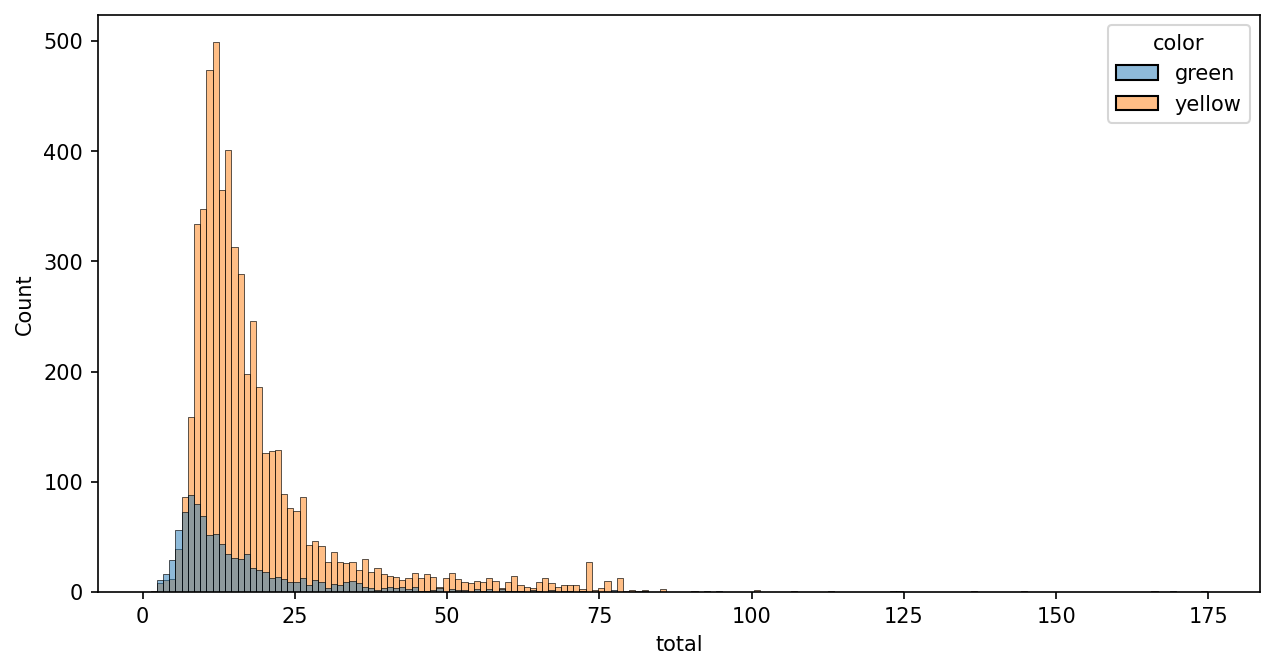

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

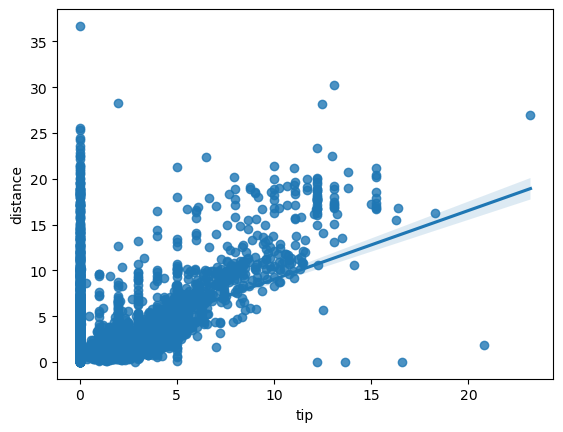

In [41]:
sns.regplot(data=df_taxi_clean, x="tip", y="distance", scatter = True);

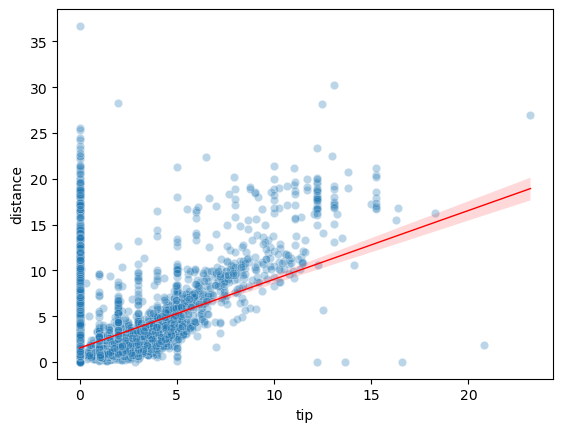

In [42]:
sns.scatterplot(data=df_taxi_clean, x="tip", y="distance", alpha=.3)
sns.regplot(data=df_taxi_clean, x="tip", y="distance", scatter = False, color='red', line_kws= {'linewidth': 1});

Один з можливих результатів (побудовано з seaborn):

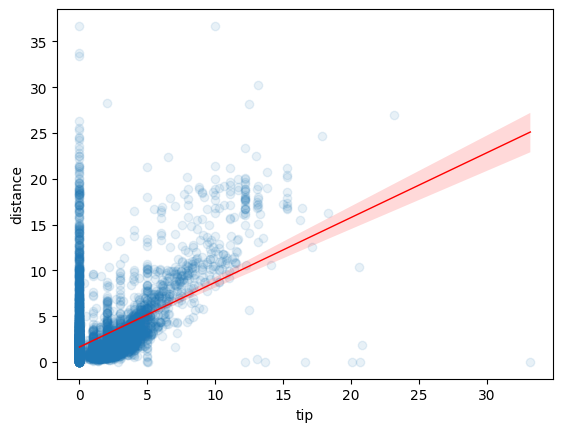

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

Відповідь: Ця лінія відображає ті поїздки, на яких не було отримано чайові (=0)

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

Спочатку створю півот з даними:

In [44]:
tips_mean_pivot = df_taxi_clean.pivot_table(index=['pickup_day'], 
                                       columns=['pickup_borough'],
                                       values='tip').fillna(0)
tips_mean_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,0.194286,0.980000,2.064555,1.300000
2019-03-02,0.000000,0.681000,1.770060,1.861875
2019-03-03,0.333333,1.339091,1.895426,2.365385
2019-03-04,0.000000,0.397000,1.657405,4.745417
2019-03-05,0.000000,0.823158,1.904469,2.665714
2019-03-06,0.000000,0.608000,2.084667,3.171538
2019-03-07,0.000000,1.268125,1.892258,4.332667
2019-03-08,0.500000,0.468182,1.901140,3.519048
2019-03-09,0.000000,1.323333,1.878393,2.175000


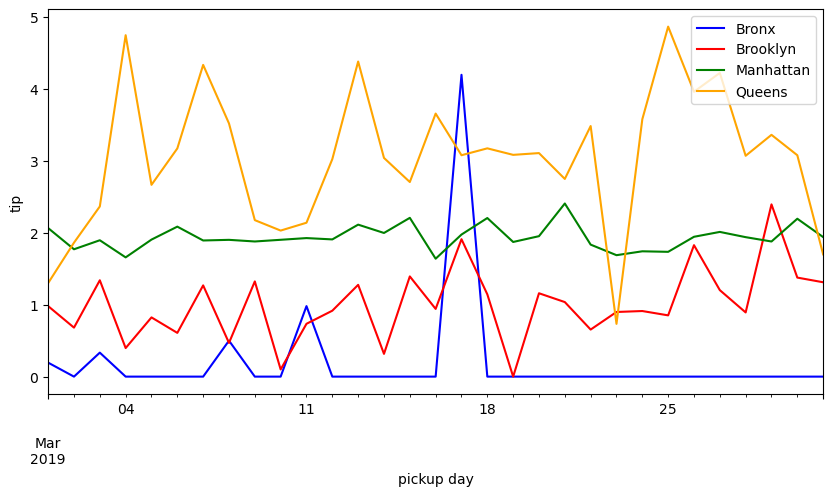

In [45]:
fig, ax = plt.subplots(figsize=(10, 5)) 
tips_plt = tips_mean_pivot.plot(ax = ax, alpha=1,color=['blue','red','green','orange'])
tips_plt.legend(loc = 'upper right')
plt.xlabel('pickup day')
plt.ylabel('tip')

plt.show();

In [46]:
tips_mean_pivot.describe()

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
count,31.000000,31.000000,31.000000,31.000000
mean,0.200084,1.004246,1.937137,3.043256
std,0.768467,0.508818,0.170913,0.967695
min,0.000000,0.000000,1.638844,0.733333
25%,0.000000,0.707583,1.874881,2.515549
50%,0.000000,0.941053,1.907167,3.077143
75%,0.000000,1.293582,2.003977,3.548274
max,4.195000,2.394000,2.406066,4.864737


Відповіді на питання:
1. Незважаючи на "викид" у вигляді високих чайових 17 березня, район Bronx має найнижчий середній рівень чайових

2. Район Queens має найвищий середній рівень чайових

3. У районі Manhattan спостерігається найнижчий "розкид" розміру чайових, і вони стабільно стримаються на рівні +-2$

Один з можливих результатів (побудовано з seaborn):

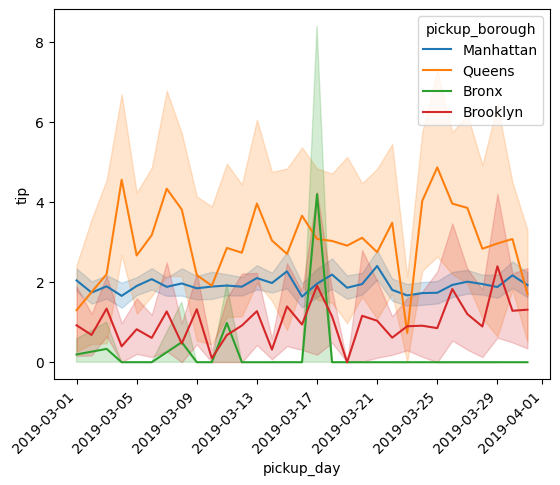

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

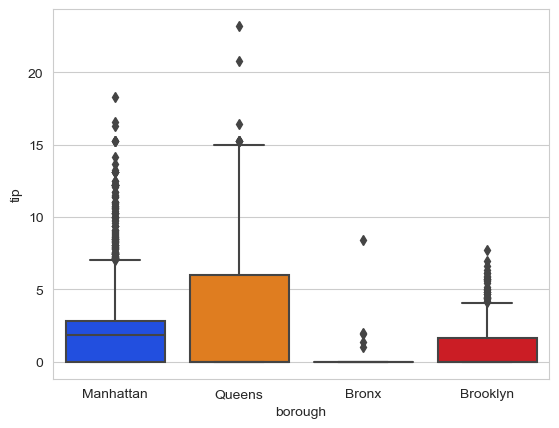

In [48]:
sns.set_style('whitegrid') 
sns.set_palette('bright') 
sns.boxplot(data = df_taxi_clean, x = 'pickup_borough', y = 'tip')
plt.xlabel ('borough')
plt.ylabel('tip');

Один з можливих результатів (побудовано з seaborn):

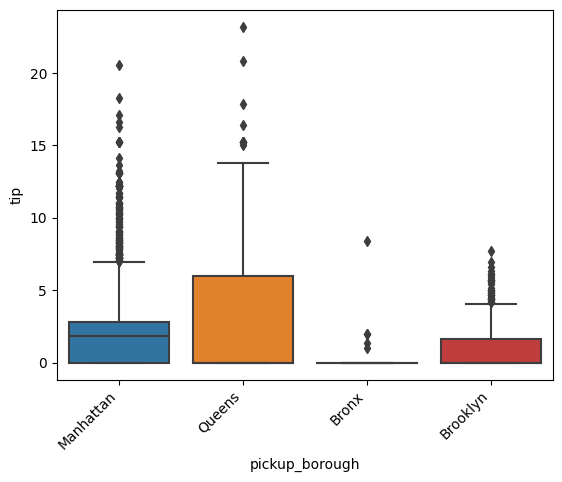

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

1. В який час доби найбільше поїздок?
2. Скільки зазвичай пасажирів у одній поїздці?
4. Який метод оплати переважає в залежності від pickup borough?

1. В який час доби найбільше поїздок?

Для початку потрібно створити окрему колонку, де буде визначено час доби поїздки

In [49]:
df_taxi_clean['time'] = df_taxi_clean['pickup'].dt.hour

/var/folders/zl/bwysq3tn1kx6l6hdmp9mxqtm0000gn/T/ipykernel_36034/3610123254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taxi_clean['time'] = df_taxi_clean['pickup'].dt.hour


In [125]:
rush_hour = df_taxi_clean.groupby('time').size()

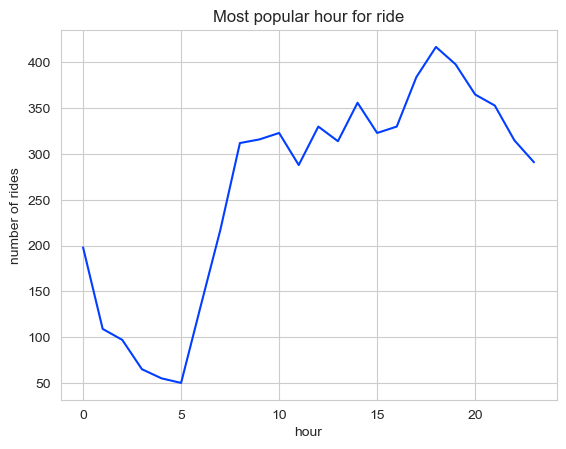

In [128]:
plt.plot(rush_hour)
plt.xlabel ('hour')
plt.ylabel ('number of rides')
plt.title ("Most popular hour for ride");

Як бачимо, у вечірній час доби у період 16-19 годину досгається пік по кількості поїздок, і найменша їх кількість близько 5ї ранку

2. Скільки зазвичай пасажирів у одній поїздці?
Спробую побудувати за допомогою pie chart

In [50]:
passengers_count = df_taxi_clean['passengers'].value_counts().to_frame()
passengers_count

,passengers
1,4607
2,865
5,277
3,240
6,152
4,109
0,90


In [51]:
passengers_count.drop(labels = 0)

,passengers
1,4607
2,865
5,277
3,240
6,152
4,109


Як бачимо - у нас є значення, де кількість пасажирів 0. Є гіпотези, що це ті поїздки, в яких або не було зафіксовано пасажирів чисто технічно, або ж це ті поїздки, де такі виступало у якості доставки якогось товару. Щоб перевірити це, потрібно вивести дані, де к-ть пасажирів 0.

In [52]:
df_taxi_clean[df_taxi_clean['passengers'] ==0]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,Hour_pickup,Hour_dropoff,drive_time,pickup_day,time
14,2019-03-27 12:13:34,2019-03-27 12:25:48,0,2.9,11.5,0.00,0.00,14.80,yellow,cash,Financial District North,Two Bridges/Seward Park,Manhattan,Manhattan,2019-03-27 12:13:34,2019-03-27 12:25:48,0 days 00:12:14,2019-03-27,12
41,2019-03-24 18:42:56,2019-03-24 19:09:00,0,4.5,20.0,0.00,0.00,23.30,yellow,cash,TriBeCa/Civic Center,Kips Bay,Manhattan,Manhattan,2019-03-24 18:42:56,2019-03-24 19:09:00,0 days 00:26:04,2019-03-24,18
92,2019-03-28 07:05:19,2019-03-28 07:41:14,0,10.6,33.5,0.00,5.76,40.06,yellow,credit card,East Tremont,Midtown East,Bronx,Manhattan,2019-03-28 07:05:19,2019-03-28 07:41:14,0 days 00:35:55,2019-03-28,7
117,2019-03-23 09:39:25,2019-03-23 09:56:45,0,3.6,15.5,3.75,0.00,22.55,yellow,credit card,Yorkville East,Penn Station/Madison Sq West,Manhattan,Manhattan,2019-03-23 09:39:25,2019-03-23 09:56:45,0 days 00:17:20,2019-03-23,9
178,2019-03-16 17:27:17,2019-03-16 17:41:03,0,3.5,14.5,0.00,0.00,15.30,yellow,cash,Manhattan Valley,Washington Heights South,Manhattan,Manhattan,2019-03-16 17:27:17,2019-03-16 17:41:03,0 days 00:13:46,2019-03-16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5145,2019-03-29 19:16:31,2019-03-29 19:23:47,0,1.4,7.0,1.00,0.00,12.30,yellow,credit card,Upper East Side North,Lenox Hill East,Manhattan,Manhattan,2019-03-29 19:16:31,2019-03-29 19:23:47,0 days 00:07:16,2019-03-29,19
5187,2019-03-05 00:42:20,2019-03-05 00:51:13,0,2.2,9.0,3.05,0.00,13.35,yellow,credit card,LaGuardia Airport,Jackson Heights,Queens,Queens,2019-03-05 00:42:20,2019-03-05 00:51:13,0 days 00:08:53,2019-03-05,0
5280,2019-03-15 23:33:56,2019-03-15 23:51:39,0,3.6,14.0,4.45,0.00,22.25,yellow,credit card,Upper West Side North,Penn Station/Madison Sq West,Manhattan,Manhattan,2019-03-15 23:33:56,2019-03-15 23:51:39,0 days 00:17:43,2019-03-15,23
5741,2019-03-30 13:29:38,2019-03-30 13:48:18,0,3.0,14.5,3.05,0.00,18.35,green,credit card,Central Harlem North,Manhattan Valley,Manhattan,Manhattan,2019-03-30 13:29:38,2019-03-30 13:48:18,0 days 00:18:40,2019-03-30,13


В цілому - в більшості випадків інші дані введено, тому надалі я аналізуватиму, припускаючи що к-ть пасажирів 0 - не є помилкою, а таксі використовувалось у якості delivery.

In [53]:
passengers_count['Share of total, %'] = df_taxi_clean['passengers'].value_counts(normalize=True).to_frame() *100
passengers_count
with pd.option_context("display.precision",1):
    display(passengers_count)

,passengers,"Share of total, %"
1,4607,72.7
2,865,13.6
5,277,4.4
3,240,3.8
6,152,2.4
4,109,1.7
0,90,1.4


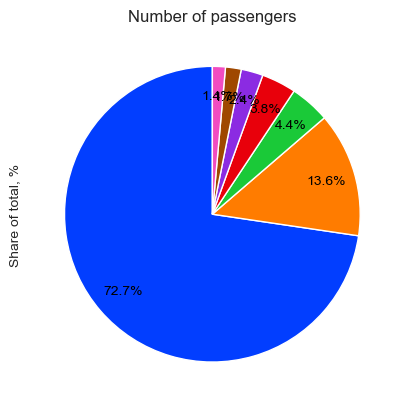

In [55]:
passengers_count['Share of total, %'].plot.pie(labels=None,autopct='%.1f%%',pctdistance = 0.8,startangle=90, textprops={'color': 'black'})
plt.title ('Number of passengers');

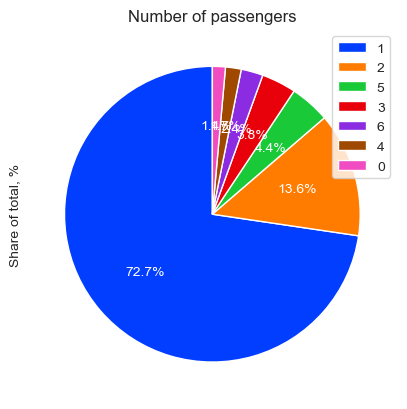

In [56]:
passengers_count['Share of total, %'].plot.pie(autopct='%.1f%%', startangle=90,textprops={'color': 'white'})
plt.title ('Number of passengers')
plt.legend(loc = 'upper right');

3. Який метод оплати переважає в залежності від pickup borough? (два варіанти графіку)

In [57]:
payment_by_borough = df_taxi_clean.groupby('pickup_borough')['payment'].value_counts().unstack()

In [58]:
payment_percentages = df_taxi_clean.groupby('pickup_borough')['payment'].value_counts(normalize=True).unstack()

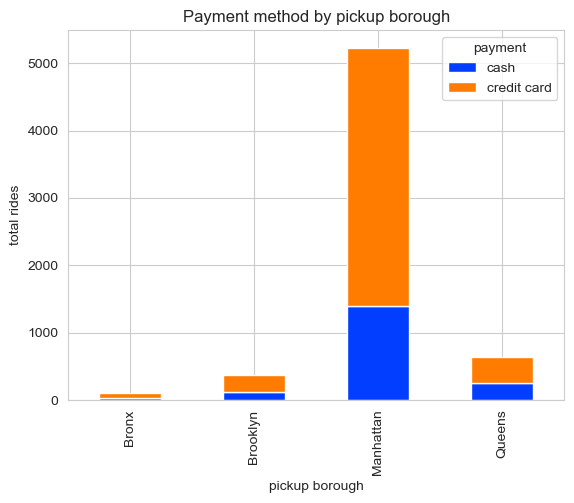

In [66]:
payment_by_borough.plot(kind='bar', stacked=True)
plt.xlabel ('pickup borough')
plt.ylabel ('total rides')
plt. title ('Payment method by pickup borough');

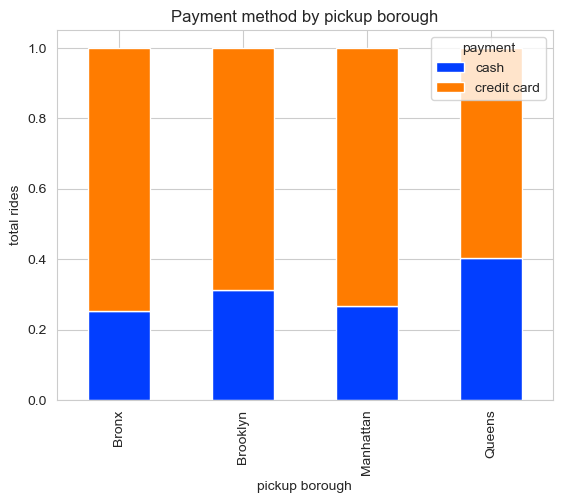

In [71]:
payment_percentages.plot(kind='bar', stacked=True);
plt.xlabel ('pickup borough')
plt.ylabel ('total rides')
plt. title ('Payment method by pickup borough');